# Agricultural Crop Yield Prediction: A Machine Learning Approach



## Problem Statement

This project addresses the critical challenge of agricultural crop yield prediction in India, a country where agriculture employs over 50% of the workforce and contributes significantly to the economy. Accurate yield prediction is essential for:

- **Food Security Planning**: Ensuring adequate food supply for India's growing population
- **Resource Optimization**: Efficient allocation of fertilizers, pesticides, and irrigation
- **Economic Planning**: Supporting farmers' decision-making and government policy formulation
- **Climate Adaptation**: Understanding the impact of environmental factors on crop productivity

The dataset encompasses agricultural data for multiple crops cultivated across various Indian states from 1997-2020, providing a comprehensive foundation for developing predictive models that can inform agricultural practices and policy decisions.

## Dataset Overview

The Agricultural Crop Yield in Indian States Dataset contains 19,698 records with 10 features covering:
- **Crop Information**: Crop type, year, season
- **Geographic Data**: State location
- **Agricultural Inputs**: Area under cultivation, fertilizer and pesticide usage
- **Environmental Factors**: Annual rainfall
- **Output Metrics**: Production quantity and calculated yield

This dataset enables the development of machine learning models to predict crop yields based on various agronomic and environmental factors, supporting evidence-based agricultural decision-making.

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Configure matplotlib for better plots
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Libraries imported successfully!
TensorFlow version: 2.19.0
Pandas version: 2.2.2
NumPy version: 2.0.2


In [15]:
# Load the dataset
df = pd.read_csv('crop_yield.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display basic information about the dataset
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Number of records: {len(df):,}")
print(f"Number of features: {df.shape[1]}")
print(f"Date range: {df['Crop_Year'].min()} - {df['Crop_Year'].max()}")
print(f"Number of unique crops: {df['Crop'].nunique()}")
print(f"Number of states: {df['State'].nunique()}")
print(f"Number of seasons: {df['Season'].nunique()}")

# Display first few rows
print("\n" + "="*50)
print("FIRST 5 ROWS")
print("="*50)
df.head()


Dataset loaded successfully!
Dataset shape: (19689, 10)
Memory usage: 4.36 MB

DATASET OVERVIEW
Number of records: 19,689
Number of features: 10
Date range: 1997 - 2020
Number of unique crops: 55
Number of states: 30
Number of seasons: 6

FIRST 5 ROWS


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


## 1. Data Exploration and Analysis

This section provides a comprehensive analysis of the dataset to understand its characteristics, identify patterns, and detect potential issues that need to be addressed during preprocessing.


In [16]:
# Dataset information and data types
print("="*60)
print("DATASET INFORMATION")
print("="*60)
print(df.info())

print("\n" + "="*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)
print(df.describe())

print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("✅ No missing values found in the dataset!")


DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB
None

DESCRIPTIVE STATISTICS
          Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.3

In [17]:
# Categorical variables analysis
print("="*60)
print("CATEGORICAL VARIABLES ANALYSIS")
print("="*60)

categorical_cols = ['Crop', 'Season', 'State']
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most frequent: {df[col].value_counts().head(3).to_dict()}")

# Target variable analysis
print("\n" + "="*60)
print("TARGET VARIABLE (YIELD) ANALYSIS")
print("="*60)
print(f"Yield statistics:")
print(f"  Mean: {df['Yield'].mean():.4f}")
print(f"  Median: {df['Yield'].median():.4f}")
print(f"  Std: {df['Yield'].std():.4f}")
print(f"  Min: {df['Yield'].min():.4f}")
print(f"  Max: {df['Yield'].max():.4f}")
print(f"  Skewness: {df['Yield'].skew():.4f}")
print(f"  Kurtosis: {df['Yield'].kurtosis():.4f}")

# Check for extreme outliers
Q1 = df['Yield'].quantile(0.25)
Q3 = df['Yield'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Yield'] < lower_bound) | (df['Yield'] > upper_bound)]
print(f"\nOutliers detected: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")


CATEGORICAL VARIABLES ANALYSIS

CROP:
  Unique values: 55
  Most frequent: {'Rice': 1197, 'Maize': 975, 'Moong(Green Gram)': 740}

SEASON:
  Unique values: 6
  Most frequent: {'Kharif     ': 8232, 'Rabi       ': 5742, 'Whole Year ': 3717}

STATE:
  Unique values: 30
  Most frequent: {'Karnataka': 1432, 'Andhra Pradesh': 1266, 'West Bengal': 1094}

TARGET VARIABLE (YIELD) ANALYSIS
Yield statistics:
  Mean: 79.9540
  Median: 1.0300
  Std: 878.3062
  Min: 0.0000
  Max: 21105.0000
  Skewness: 12.7853
  Kurtosis: 175.5773

Outliers detected: 3065 (15.57%)


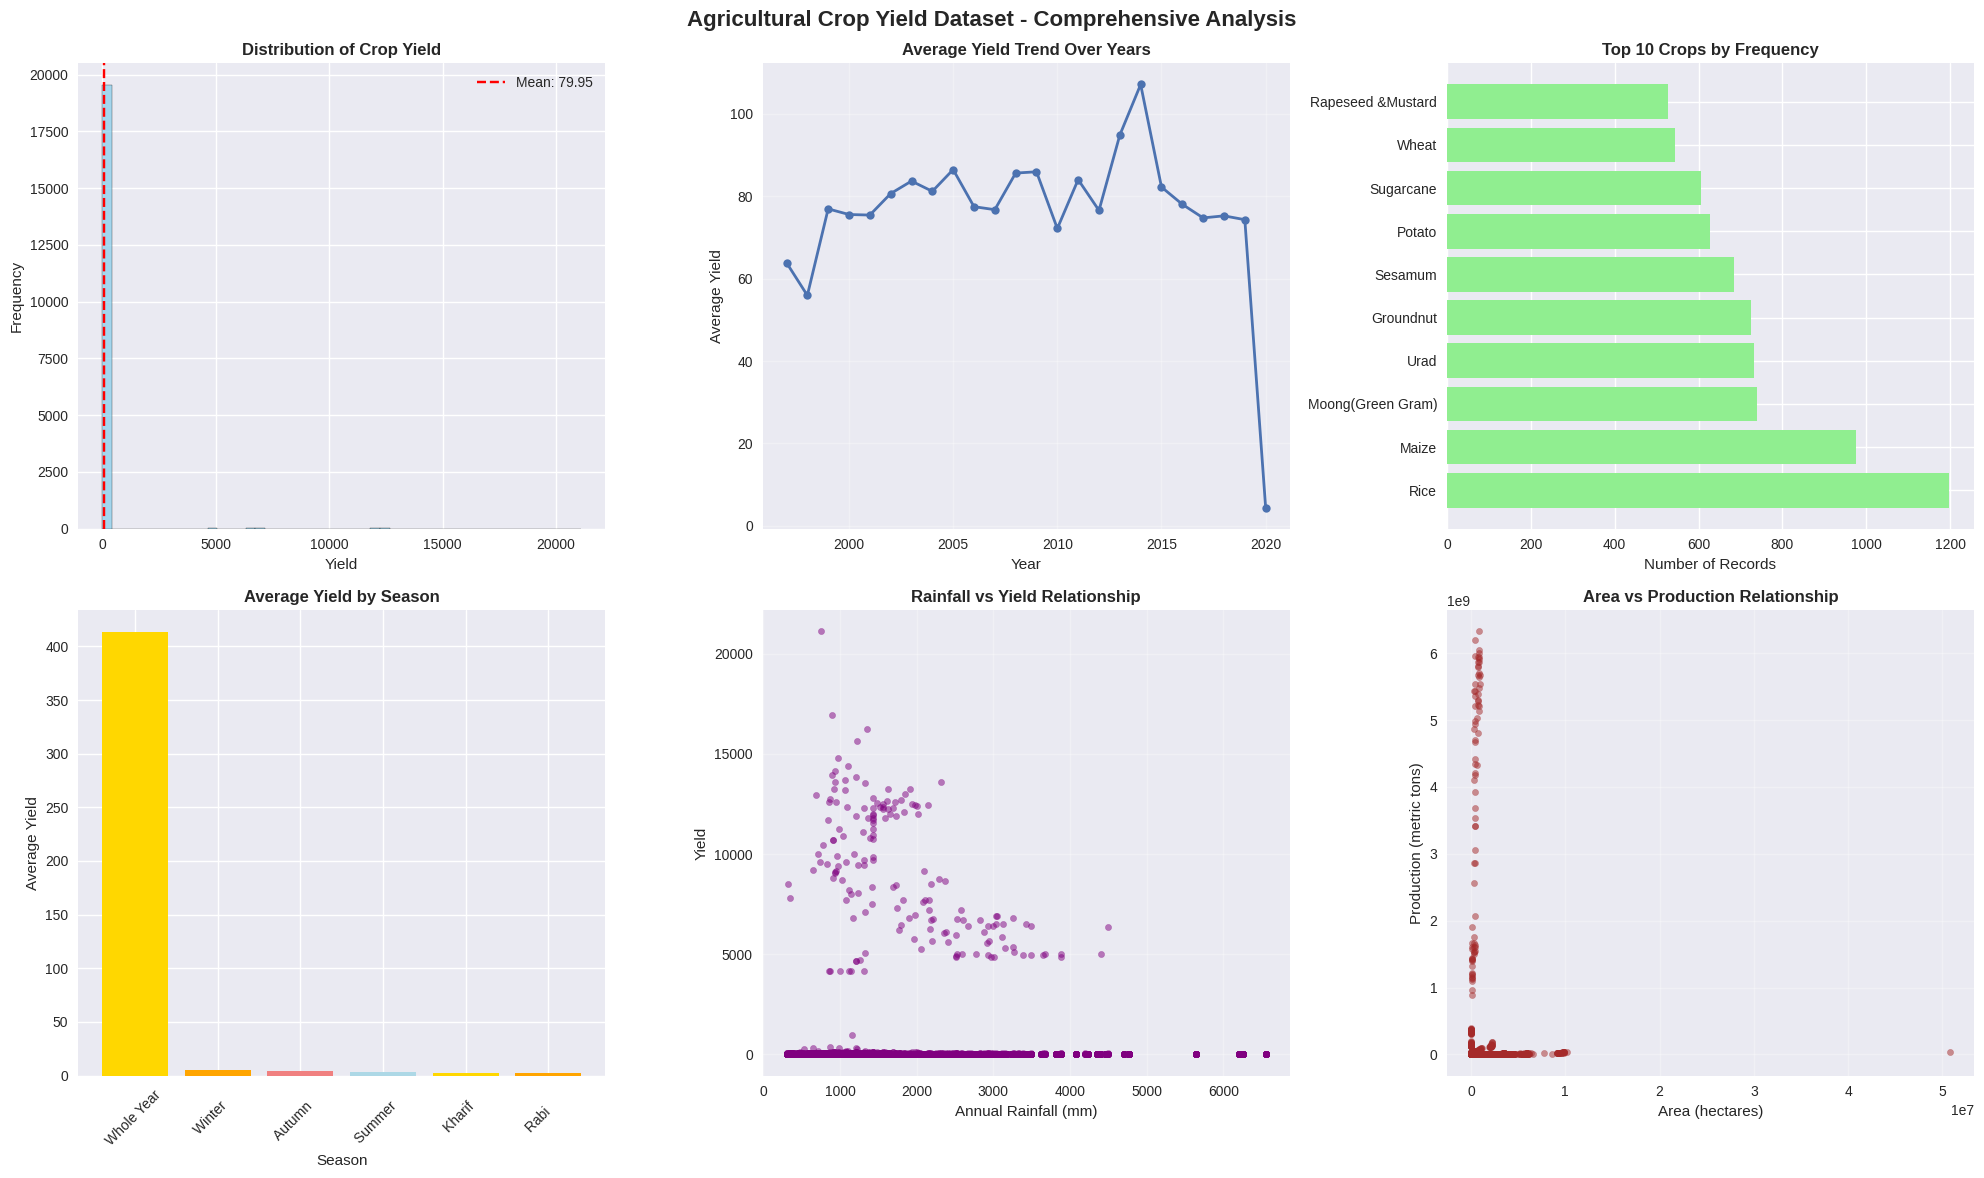

📊 Visualizations completed! Key insights:
• Yield distribution shows 12.79 skewness (right-skewed)
• Dataset spans 24 years
• Most common crop: Rice
• Most productive season: Whole Year 


In [18]:
# Comprehensive data visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Agricultural Crop Yield Dataset - Comprehensive Analysis', fontsize=16, fontweight='bold')

# 1. Yield distribution
axes[0, 0].hist(df['Yield'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Crop Yield', fontweight='bold')
axes[0, 0].set_xlabel('Yield')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Yield'].mean(), color='red', linestyle='--', label=f'Mean: {df["Yield"].mean():.2f}')
axes[0, 0].legend()

# 2. Yield vs Year trend
yearly_yield = df.groupby('Crop_Year')['Yield'].mean()
axes[0, 1].plot(yearly_yield.index, yearly_yield.values, marker='o', linewidth=2, markersize=6)
axes[0, 1].set_title('Average Yield Trend Over Years', fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average Yield')
axes[0, 1].grid(True, alpha=0.3)

# 3. Top 10 crops by frequency
top_crops = df['Crop'].value_counts().head(10)
axes[0, 2].barh(range(len(top_crops)), top_crops.values, color='lightgreen')
axes[0, 2].set_yticks(range(len(top_crops)))
axes[0, 2].set_yticklabels(top_crops.index)
axes[0, 2].set_title('Top 10 Crops by Frequency', fontweight='bold')
axes[0, 2].set_xlabel('Number of Records')

# 4. Yield by Season
season_yield = df.groupby('Season')['Yield'].mean().sort_values(ascending=False)
axes[1, 0].bar(season_yield.index, season_yield.values, color=['gold', 'orange', 'lightcoral', 'lightblue'])
axes[1, 0].set_title('Average Yield by Season', fontweight='bold')
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('Average Yield')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Rainfall vs Yield scatter plot
axes[1, 1].scatter(df['Annual_Rainfall'], df['Yield'], alpha=0.5, s=20, color='purple')
axes[1, 1].set_title('Rainfall vs Yield Relationship', fontweight='bold')
axes[1, 1].set_xlabel('Annual Rainfall (mm)')
axes[1, 1].set_ylabel('Yield')
axes[1, 1].grid(True, alpha=0.3)

# 6. Area vs Production scatter plot
axes[1, 2].scatter(df['Area'], df['Production'], alpha=0.5, s=20, color='brown')
axes[1, 2].set_title('Area vs Production Relationship', fontweight='bold')
axes[1, 2].set_xlabel('Area (hectares)')
axes[1, 2].set_ylabel('Production (metric tons)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Visualizations completed! Key insights:")
print(f"• Yield distribution shows {df['Yield'].skew():.2f} skewness (right-skewed)")
print(f"• Dataset spans {df['Crop_Year'].max() - df['Crop_Year'].min() + 1} years")
print(f"• Most common crop: {df['Crop'].value_counts().index[0]}")
print(f"• Most productive season: {season_yield.index[0]}")


CORRELATION ANALYSIS


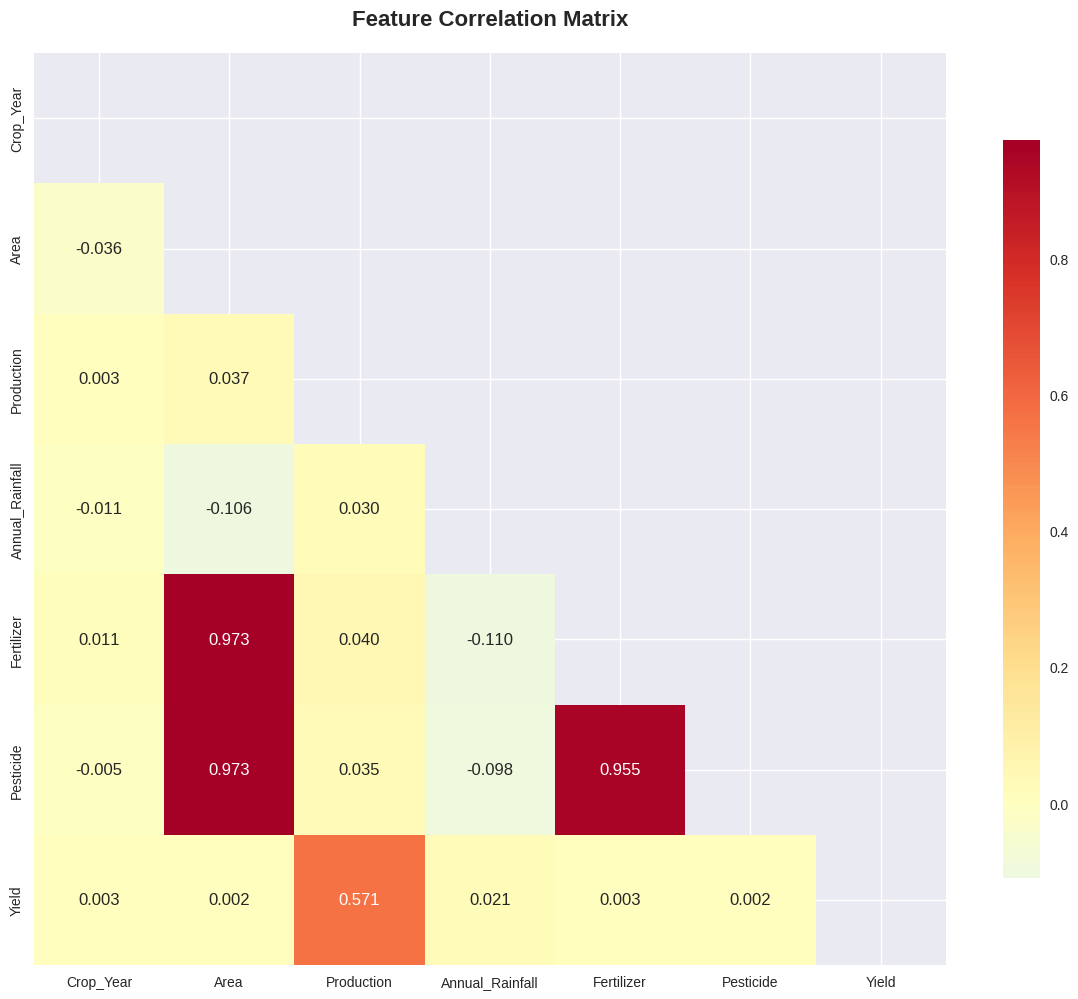


Correlation with Yield (target variable):
  Production: 0.5708
  Annual_Rainfall: 0.0208
  Fertilizer: 0.0029
  Crop_Year: 0.0025
  Area: 0.0019
  Pesticide: 0.0018

🔍 Key Insights:
• Strongest positive correlation with yield: Production (0.5708)
• Strongest negative correlation with yield: Pesticide (0.0018)
• Production and Area show very high correlation (0.0374) - potential multicollinearity


In [19]:
# Correlation analysis and feature relationships
print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Calculate correlation matrix for numerical features
numerical_features = ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']
correlation_matrix = df[numerical_features].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Detailed correlation analysis with Yield
yield_correlations = correlation_matrix['Yield'].sort_values(ascending=False)
print("\nCorrelation with Yield (target variable):")
for feature, corr in yield_correlations.items():
    if feature != 'Yield':
        print(f"  {feature}: {corr:.4f}")

# Feature importance insights
print(f"\n🔍 Key Insights:")
print(f"• Strongest positive correlation with yield: {yield_correlations.index[1]} ({yield_correlations.iloc[1]:.4f})")
print(f"• Strongest negative correlation with yield: {yield_correlations.index[-1]} ({yield_correlations.iloc[-1]:.4f})")
print(f"• Production and Area show very high correlation ({correlation_matrix.loc['Production', 'Area']:.4f}) - potential multicollinearity")


## 2. Data Preprocessing and Feature Engineering

This section focuses on preparing the data for machine learning by addressing data quality issues, handling categorical variables, and creating meaningful features that can improve model performance.


In [20]:
# Data preprocessing and feature engineering
print("="*60)
print("DATA PREPROCESSING AND FEATURE ENGINEERING")
print("="*60)

# Create a copy of the original dataset for preprocessing
df_processed = df.copy()

# 1. Handle categorical variables
print("1. Handling Categorical Variables:")
print(f"   Original categorical columns: {['Crop', 'Season', 'State']}")

# Clean categorical variables (remove extra spaces)
df_processed['Crop'] = df_processed['Crop'].str.strip()
df_processed['Season'] = df_processed['Season'].str.strip()
df_processed['State'] = df_processed['State'].str.strip()

# Check for any remaining inconsistencies
print(f"   Unique crops: {df_processed['Crop'].nunique()}")
print(f"   Unique seasons: {df_processed['Season'].nunique()}")
print(f"   Unique states: {df_processed['State'].nunique()}")

# 2. Feature Engineering
print("\n2. Feature Engineering:")

# Create efficiency features
df_processed['Fertilizer_per_Area'] = df_processed['Fertilizer'] / df_processed['Area']
df_processed['Pesticide_per_Area'] = df_processed['Pesticide'] / df_processed['Area']
df_processed['Production_per_Area'] = df_processed['Production'] / df_processed['Area']

# Create rainfall categories
df_processed['Rainfall_Category'] = pd.cut(df_processed['Annual_Rainfall'],
                                         bins=[0, 1000, 1500, 2000, float('inf')],
                                         labels=['Low', 'Medium', 'High', 'Very High'])

# Create area categories
df_processed['Area_Category'] = pd.cut(df_processed['Area'],
                                     bins=[0, 10000, 50000, 100000, float('inf')],
                                     labels=['Small', 'Medium', 'Large', 'Very Large'])

# Create decade feature
df_processed['Decade'] = (df_processed['Crop_Year'] // 10) * 10

print("   ✅ Created efficiency features (Fertilizer_per_Area, Pesticide_per_Area)")
print("   ✅ Created categorical features (Rainfall_Category, Area_Category)")
print("   ✅ Created temporal feature (Decade)")

# 3. Handle outliers
print("\n3. Outlier Detection and Handling:")

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers in key numerical features
numerical_cols = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']
outlier_summary = {}

for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df_processed, col)
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': len(outliers) / len(df_processed) * 100,
        'lower_bound': lower,
        'upper_bound': upper
    }
    print(f"   {col}: {len(outliers)} outliers ({len(outliers)/len(df_processed)*100:.2f}%)")

print("\n4. Data Quality Assessment:")
print(f"   Total records: {len(df_processed):,}")
print(f"   Features after engineering: {df_processed.shape[1]}")
print(f"   Memory usage: {df_processed.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATA PREPROCESSING AND FEATURE ENGINEERING
1. Handling Categorical Variables:
   Original categorical columns: ['Crop', 'Season', 'State']
   Unique crops: 55
   Unique seasons: 6
   Unique states: 30

2. Feature Engineering:
   ✅ Created efficiency features (Fertilizer_per_Area, Pesticide_per_Area)
   ✅ Created categorical features (Rainfall_Category, Area_Category)
   ✅ Created temporal feature (Decade)

3. Outlier Detection and Handling:
   Area: 3076 outliers (15.62%)
   Production: 3373 outliers (17.13%)
   Annual_Rainfall: 1527 outliers (7.76%)
   Fertilizer: 3093 outliers (15.71%)
   Pesticide: 3036 outliers (15.42%)
   Yield: 3065 outliers (15.57%)

4. Data Quality Assessment:
   Total records: 19,689
   Features after engineering: 16
   Memory usage: 4.91 MB


In [21]:
# Prepare data for machine learning
print("="*60)
print("PREPARING DATA FOR MACHINE LEARNING")
print("="*60)

# Select features for modeling
# We'll use both original and engineered features
feature_columns = [
    'Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide',
    'Fertilizer_per_Area', 'Pesticide_per_Area', 'Production_per_Area', 'Decade',
    'Crop', 'Season', 'State', 'Rainfall_Category', 'Area_Category'
]

# Separate features and target
X = df_processed[feature_columns].copy()
y = df_processed['Yield'].copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Handle categorical variables using different encoding strategies
print("\n5. Encoding Categorical Variables:")

# For traditional ML models - use Label Encoding for high cardinality, OneHot for low cardinality
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_columns = ['Crop', 'Season', 'State', 'Rainfall_Category', 'Area_Category']
numerical_columns = ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
                    'Pesticide', 'Fertilizer_per_Area', 'Pesticide_per_Area', 'Production_per_Area', 'Decade']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ]
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

print(f"   ✅ Applied StandardScaler to numerical features")
print(f"   ✅ Applied OneHotEncoder to categorical features")
print(f"   Processed feature matrix shape: {X_processed.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=None
)

print(f"\n6. Data Splitting:")
print(f"   Training set: {X_train.shape[0]:,} samples")
print(f"   Test set: {X_test.shape[0]:,} samples")
print(f"   Training features: {X_train.shape[1]}")
print(f"   Test features: {X_test.shape[1]}")

# Display feature names after preprocessing
feature_names = (numerical_columns +
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)))

print(f"\n7. Final Feature Names ({len(feature_names)} features):")
for i, name in enumerate(feature_names[:10]):  # Show first 10
    print(f"   {i+1:2d}. {name}")
if len(feature_names) > 10:
    print(f"   ... and {len(feature_names) - 10} more features")

print(f"\n✅ Data preprocessing completed successfully!")
print(f"   Ready for machine learning with {X_train.shape[1]} features")


PREPARING DATA FOR MACHINE LEARNING
Feature matrix shape: (19689, 15)
Target vector shape: (19689,)

5. Encoding Categorical Variables:
   ✅ Applied StandardScaler to numerical features
   ✅ Applied OneHotEncoder to categorical features
   Processed feature matrix shape: (19689, 104)

6. Data Splitting:
   Training set: 15,751 samples
   Test set: 3,938 samples
   Training features: 104
   Test features: 104

7. Final Feature Names (104 features):
    1. Crop_Year
    2. Area
    3. Production
    4. Annual_Rainfall
    5. Fertilizer
    6. Pesticide
    7. Fertilizer_per_Area
    8. Pesticide_per_Area
    9. Production_per_Area
   10. Decade
   ... and 94 more features

✅ Data preprocessing completed successfully!
   Ready for machine learning with 104 features


## 3. Traditional Machine Learning Models

This section implements and evaluates various traditional machine learning algorithms using Scikit-learn. We'll compare different approaches including linear models, ensemble methods, and support vector machines to establish baseline performance metrics.


In [22]:
# Traditional Machine Learning Models Implementation
print("="*60)
print("TRADITIONAL MACHINE LEARNING MODELS")
print("="*60)

# Import additional ML models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# Define models to test
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR (RBF)': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'SVR (Linear)': SVR(kernel='linear', C=1.0),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate a model and return performance metrics"""
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    training_time = time.time() - start_time

    return {
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Training_Time': training_time,
        'Overfitting': train_r2 - test_r2
    }

# Evaluate all models
print("Evaluating traditional ML models...")
results = []

for name, model in models.items():
    print(f"  Training {name}...")
    result = evaluate_model(model, X_train, X_test, y_train, y_test, name)
    results.append(result)

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test_R2', ascending=False)

print("\n" + "="*80)
print("TRADITIONAL ML MODELS - PERFORMANCE SUMMARY")
print("="*80)
print(results_df.round(4))

# Identify best performing models
best_model_name = results_df.iloc[0]['Model']
best_test_r2 = results_df.iloc[0]['Test_R2']
best_test_rmse = results_df.iloc[0]['Test_RMSE']

print(f"\n🏆 Best Performing Model: {best_model_name}")
print(f"   Test R² Score: {best_test_r2:.4f}")
print(f"   Test RMSE: {best_test_rmse:.4f}")

# Analyze overfitting
print(f"\n📊 Overfitting Analysis:")
overfitting_analysis = results_df[['Model', 'Train_R2', 'Test_R2', 'Overfitting']].copy()
overfitting_analysis['Overfitting_Level'] = overfitting_analysis['Overfitting'].apply(
    lambda x: 'High' if x > 0.1 else 'Medium' if x > 0.05 else 'Low'
)
print(overfitting_analysis)


TRADITIONAL MACHINE LEARNING MODELS
Evaluating traditional ML models...
  Training Linear Regression...
  Training Ridge Regression...
  Training Lasso Regression...
  Training Elastic Net...
  Training Decision Tree...
  Training Random Forest...
  Training Gradient Boosting...
  Training SVR (RBF)...
  Training SVR (Linear)...
  Training K-Nearest Neighbors...

TRADITIONAL ML MODELS - PERFORMANCE SUMMARY
                 Model  Train_RMSE  Test_RMSE  Train_MAE  Test_MAE  Train_R2  \
5        Random Forest     31.1208    66.6021     1.8108    4.2935    0.9987   
6    Gradient Boosting     17.7722    67.9153     1.7043    4.5521    0.9996   
2     Lasso Regression     73.3666    68.1037     7.1525    6.8714    0.9930   
1     Ridge Regression     73.2736    68.1913     8.2643    7.9446    0.9930   
0    Linear Regression     73.2719    68.2320     8.2691    7.9420    0.9930   
3          Elastic Net     88.5962    77.1519    12.1486   11.7847    0.9897   
8         SVR (Linear)    111.

In [23]:
# Hyperparameter Tuning for Best Traditional ML Models
print("="*60)
print("HYPERPARAMETER TUNING - TRADITIONAL ML MODELS")
print("="*60)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Select top 3 models for hyperparameter tuning
top_models = results_df.head(3)['Model'].tolist()
print(f"Selected top 3 models for hyperparameter tuning: {top_models}")

# Define hyperparameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    'Ridge Regression': {
        'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
    }
}

# Models for tuning
tuning_models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Ridge Regression': Ridge(random_state=42)
}

# Perform hyperparameter tuning
tuned_results = []

for model_name in top_models:
    if model_name in param_grids:
        print(f"\nTuning {model_name}...")

        # Use RandomizedSearchCV for efficiency
        search = RandomizedSearchCV(
            tuning_models[model_name],
            param_grids[model_name],
            n_iter=20,  # Number of parameter settings sampled
            cv=5,
            scoring='r2',
            random_state=42,
            n_jobs=-1
        )

        start_time = time.time()
        search.fit(X_train, y_train)
        tuning_time = time.time() - start_time

        # Evaluate tuned model
        y_train_pred_tuned = search.predict(X_train)
        y_test_pred_tuned = search.predict(X_test)

        tuned_result = {
            'Model': f"{model_name} (Tuned)",
            'Train_RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_tuned)),
            'Test_RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_tuned)),
            'Train_MAE': mean_absolute_error(y_train, y_train_pred_tuned),
            'Test_MAE': mean_absolute_error(y_test, y_test_pred_tuned),
            'Train_R2': r2_score(y_train, y_train_pred_tuned),
            'Test_R2': r2_score(y_test, y_test_pred_tuned),
            'Training_Time': tuning_time,
            'Overfitting': r2_score(y_train, y_train_pred_tuned) - r2_score(y_test, y_test_pred_tuned),
            'Best_Params': search.best_params_
        }

        tuned_results.append(tuned_result)

        print(f"  Best parameters: {search.best_params_}")
        print(f"  Best CV score: {search.best_score_:.4f}")
        print(f"  Test R² score: {tuned_result['Test_R2']:.4f}")

# Create tuned results DataFrame
tuned_results_df = pd.DataFrame(tuned_results)
tuned_results_df = tuned_results_df.sort_values('Test_R2', ascending=False)

print("\n" + "="*80)
print("HYPERPARAMETER TUNING RESULTS")
print("="*80)
print(tuned_results_df[['Model', 'Test_R2', 'Test_RMSE', 'Test_MAE', 'Overfitting']].round(4))

# Compare original vs tuned performance
print(f"\n📈 Performance Improvement Analysis:")
for i, tuned_result in enumerate(tuned_results):
    model_name = tuned_result['Model'].replace(' (Tuned)', '')
    original_result = results_df[results_df['Model'] == model_name].iloc[0]

    r2_improvement = tuned_result['Test_R2'] - original_result['Test_R2']
    rmse_improvement = original_result['Test_RMSE'] - tuned_result['Test_RMSE']

    print(f"  {model_name}:")
    print(f"    R² improvement: {r2_improvement:+.4f}")
    print(f"    RMSE improvement: {rmse_improvement:+.4f}")

# Store best tuned model for later comparison
best_tuned_model_name = tuned_results_df.iloc[0]['Model']
best_tuned_r2 = tuned_results_df.iloc[0]['Test_R2']

print(f"\n🏆 Best Tuned Model: {best_tuned_model_name}")
print(f"   Test R² Score: {best_tuned_r2:.4f}")


HYPERPARAMETER TUNING - TRADITIONAL ML MODELS
Selected top 3 models for hyperparameter tuning: ['Random Forest', 'Gradient Boosting', 'Lasso Regression']

Tuning Random Forest...
  Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
  Best CV score: 0.9901
  Test R² score: 0.9943

Tuning Gradient Boosting...
  Best parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2}
  Best CV score: 0.9913
  Test R² score: 0.9905

HYPERPARAMETER TUNING RESULTS
                       Model  Test_R2  Test_RMSE  Test_MAE  Overfitting
0      Random Forest (Tuned)   0.9943    67.5558    4.3117       0.0040
1  Gradient Boosting (Tuned)   0.9905    87.1238    5.2304       0.0095

📈 Performance Improvement Analysis:
  Random Forest:
    R² improvement: -0.0002
    RMSE improvement: -0.9537
  Gradient Boosting:
    R² improvement: -0.0037
    RMSE improvement: -19.2086

🏆 Best Tuned Model: Random Forest (Tuned)
   Test R² S

## 4. Deep Learning Models with TensorFlow

This section implements deep learning models using TensorFlow, demonstrating both Sequential and Functional APIs. We'll explore different architectures including feedforward networks, dropout regularization, and batch normalization to capture complex patterns in the agricultural data.


In [24]:
# Deep Learning Models Implementation
print("="*60)
print("DEEP LEARNING MODELS WITH TENSORFLOW")
print("="*60)

# Import TensorFlow components
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, concatenate
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1, l2
import tensorflow as tf

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Function to create and train deep learning models
def create_and_train_dl_model(model_name, architecture_func, X_train, X_test, y_train, y_test,
                             epochs=100, batch_size=32, verbose=0):
    """Create and train a deep learning model"""

    # Create model
    model = architecture_func()

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    # Define callbacks
    callbacks = [
        EarlyStopping(patience=10, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)
    ]

    # Train model
    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=verbose
    )
    training_time = time.time() - start_time

    # Make predictions
    y_train_pred = model.predict(X_train, verbose=0)
    y_test_pred = model.predict(X_test, verbose=0)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    return {
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Training_Time': training_time,
        'Overfitting': train_r2 - test_r2,
        'Epochs_Trained': len(history.history['loss']),
        'Model_Object': model,
        'History': history
    }

# Define different architectures
def simple_feedforward():
    """Simple feedforward neural network"""
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    return model

def deep_feedforward():
    """Deeper feedforward neural network"""
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    return model

def wide_deep_network():
    """Wide and deep network architecture"""
    model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    return model

def functional_api_model():
    """Model using Functional API with skip connections"""
    inputs = Input(shape=(X_train.shape[1],))

    # First branch
    x1 = Dense(128, activation='relu')(inputs)
    x1 = BatchNormalization()(x1)
    x1 = Dropout(0.3)(x1)

    # Second branch
    x2 = Dense(64, activation='relu')(inputs)
    x2 = BatchNormalization()(x2)

    # Concatenate branches
    x = concatenate([x1, x2])
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(16, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

def regularized_model():
    """Model with L1/L2 regularization"""
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],),
              kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
        Dense(1)
    ])
    return model

# Define architectures to test
architectures = {
    'Simple Feedforward': simple_feedforward,
    'Deep Feedforward': deep_feedforward,
    'Wide Deep Network': wide_deep_network,
    'Functional API Model': functional_api_model,
    'Regularized Model': regularized_model
}

print("Training deep learning models...")
dl_results = []

for name, arch_func in architectures.items():
    print(f"  Training {name}...")
    result = create_and_train_dl_model(
        name, arch_func, X_train, X_test, y_train, y_test,
        epochs=50, verbose=0
    )
    dl_results.append(result)
    print(f"    Test R²: {result['Test_R2']:.4f}, Epochs: {result['Epochs_Trained']}")

# Create deep learning results DataFrame
dl_results_df = pd.DataFrame(dl_results)
dl_results_df = dl_results_df.sort_values('Test_R2', ascending=False)

print("\n" + "="*80)
print("DEEP LEARNING MODELS - PERFORMANCE SUMMARY")
print("="*80)
print(dl_results_df[['Model', 'Test_R2', 'Test_RMSE', 'Test_MAE', 'Overfitting', 'Epochs_Trained']].round(4))

# Identify best deep learning model
best_dl_model_name = dl_results_df.iloc[0]['Model']
best_dl_r2 = dl_results_df.iloc[0]['Test_R2']

print(f"\n🏆 Best Deep Learning Model: {best_dl_model_name}")
print(f"   Test R² Score: {best_dl_r2:.4f}")
print(f"   Epochs Trained: {dl_results_df.iloc[0]['Epochs_Trained']}")


DEEP LEARNING MODELS WITH TENSORFLOW
Training deep learning models...
  Training Simple Feedforward...
    Test R²: 0.9955, Epochs: 50
  Training Deep Feedforward...
    Test R²: 0.7566, Epochs: 11
  Training Wide Deep Network...
    Test R²: 0.9944, Epochs: 39
  Training Functional API Model...
    Test R²: 0.9429, Epochs: 11
  Training Regularized Model...
    Test R²: 0.9592, Epochs: 12

DEEP LEARNING MODELS - PERFORMANCE SUMMARY
                  Model  Test_R2  Test_RMSE  Test_MAE  Overfitting  \
0    Simple Feedforward   0.9955    60.1117    6.1005       0.0001   
2     Wide Deep Network   0.9944    66.9588    6.4496       0.0011   
4     Regularized Model   0.9592   180.7298   16.9330      -0.0024   
3  Functional API Model   0.9429   213.8394   22.5487      -0.0132   
1      Deep Feedforward   0.7566   441.5724   37.7214       0.0161   

   Epochs_Trained  
0              50  
2              39  
4              12  
3              11  
1              11  

🏆 Best Deep Learning 

In [25]:
# Hyperparameter Tuning for Deep Learning Models
print("="*60)
print("HYPERPARAMETER TUNING - DEEP LEARNING MODELS")
print("="*60)

# Select best deep learning model for hyperparameter tuning
best_dl_model_idx = dl_results_df.index[0]
best_dl_model_result = dl_results[best_dl_model_idx]

print(f"Selected best model for tuning: {best_dl_model_result['Model']}")
print(f"Current Test R²: {best_dl_model_result['Test_R2']:.4f}")

# Define hyperparameter variations for the best model
def create_tuned_architecture(learning_rate=0.001, dropout_rate=0.3, l2_reg=0.01,
                            hidden_units=[128, 64, 32]):
    """Create a tuned version of the best architecture"""
    model = Sequential()

    # Input layer
    model.add(Dense(hidden_units[0], activation='relu',
                   input_shape=(X_train.shape[1],),
                   kernel_regularizer=l2(l2_reg)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Hidden layers
    for units in hidden_units[1:]:
        model.add(Dense(units, activation='relu',
                       kernel_regularizer=l2(l2_reg)))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate * 0.8))  # Decreasing dropout

    # Output layer
    model.add(Dense(1))

    return model

# Define hyperparameter combinations to test
hyperparameter_combinations = [
    {'learning_rate': 0.001, 'dropout_rate': 0.3, 'l2_reg': 0.01, 'hidden_units': [128, 64, 32]},
    {'learning_rate': 0.0005, 'dropout_rate': 0.4, 'l2_reg': 0.005, 'hidden_units': [256, 128, 64]},
    {'learning_rate': 0.002, 'dropout_rate': 0.2, 'l2_reg': 0.02, 'hidden_units': [128, 64, 32, 16]},
    {'learning_rate': 0.001, 'dropout_rate': 0.5, 'l2_reg': 0.01, 'hidden_units': [512, 256, 128]},
    {'learning_rate': 0.0001, 'dropout_rate': 0.3, 'l2_reg': 0.005, 'hidden_units': [128, 64, 32]}
]

# Test different hyperparameter combinations
tuned_dl_results = []

for i, params in enumerate(hyperparameter_combinations):
    print(f"\nTesting combination {i+1}: {params}")

    # Create model with specific hyperparameters
    model = create_tuned_architecture(**params)

    # Compile with specific learning rate
    model.compile(
        optimizer=Adam(learning_rate=params['learning_rate']),
        loss='mse',
        metrics=['mae']
    )

    # Train model
    callbacks = [
        EarlyStopping(patience=15, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=8, min_lr=1e-7)
    ]

    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=0
    )
    training_time = time.time() - start_time

    # Evaluate
    y_train_pred = model.predict(X_train, verbose=0)
    y_test_pred = model.predict(X_test, verbose=0)

    result = {
        'Model': f"{best_dl_model_result['Model']} (Tuned {i+1})",
        'Train_RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test_RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train_MAE': mean_absolute_error(y_train, y_train_pred),
        'Test_MAE': mean_absolute_error(y_test, y_test_pred),
        'Train_R2': r2_score(y_train, y_train_pred),
        'Test_R2': r2_score(y_test, y_test_pred),
        'Training_Time': training_time,
        'Overfitting': r2_score(y_train, y_train_pred) - r2_score(y_test, y_test_pred),
        'Epochs_Trained': len(history.history['loss']),
        'Hyperparameters': params,
        'Model_Object': model,
        'History': history
    }

    tuned_dl_results.append(result)
    print(f"  Test R²: {result['Test_R2']:.4f}, Epochs: {result['Epochs_Trained']}")

# Create tuned deep learning results DataFrame
tuned_dl_results_df = pd.DataFrame(tuned_dl_results)
tuned_dl_results_df = tuned_dl_results_df.sort_values('Test_R2', ascending=False)

print("\n" + "="*80)
print("DEEP LEARNING HYPERPARAMETER TUNING RESULTS")
print("="*80)
print(tuned_dl_results_df[['Model', 'Test_R2', 'Test_RMSE', 'Test_MAE', 'Overfitting', 'Epochs_Trained']].round(4))

# Compare with original best model
original_r2 = best_dl_model_result['Test_R2']
best_tuned_r2 = tuned_dl_results_df.iloc[0]['Test_R2']
improvement = best_tuned_r2 - original_r2

print(f"\n📈 Deep Learning Performance Improvement:")
print(f"  Original best model R²: {original_r2:.4f}")
print(f"  Best tuned model R²: {best_tuned_r2:.4f}")
print(f"  Improvement: {improvement:+.4f}")

# Store best tuned deep learning model
best_tuned_dl_model = tuned_dl_results_df.iloc[0]
best_tuned_dl_model_name = best_tuned_dl_model['Model']
best_tuned_dl_r2 = best_tuned_dl_model['Test_R2']

print(f"\n🏆 Best Tuned Deep Learning Model: {best_tuned_dl_model_name}")
print(f"   Test R² Score: {best_tuned_dl_r2:.4f}")
print(f"   Best Hyperparameters: {best_tuned_dl_model['Hyperparameters']}")


HYPERPARAMETER TUNING - DEEP LEARNING MODELS
Selected best model for tuning: Simple Feedforward
Current Test R²: 0.9955

Testing combination 1: {'learning_rate': 0.001, 'dropout_rate': 0.3, 'l2_reg': 0.01, 'hidden_units': [128, 64, 32]}
  Test R²: 0.9914, Epochs: 28

Testing combination 2: {'learning_rate': 0.0005, 'dropout_rate': 0.4, 'l2_reg': 0.005, 'hidden_units': [256, 128, 64]}
  Test R²: 0.9923, Epochs: 35

Testing combination 3: {'learning_rate': 0.002, 'dropout_rate': 0.2, 'l2_reg': 0.02, 'hidden_units': [128, 64, 32, 16]}
  Test R²: 0.9891, Epochs: 24

Testing combination 4: {'learning_rate': 0.001, 'dropout_rate': 0.5, 'l2_reg': 0.01, 'hidden_units': [512, 256, 128]}
  Test R²: 0.9852, Epochs: 24

Testing combination 5: {'learning_rate': 0.0001, 'dropout_rate': 0.3, 'l2_reg': 0.005, 'hidden_units': [128, 64, 32]}
  Test R²: 0.8047, Epochs: 100

DEEP LEARNING HYPERPARAMETER TUNING RESULTS
                          Model  Test_R2  Test_RMSE  Test_MAE  Overfitting  \
1  Simple 

## 5. Model Evaluation and Analysis

This section provides comprehensive evaluation of all models through learning curves, error analysis, and comparative performance metrics. We'll analyze the trade-offs between different approaches and identify the most effective strategies for crop yield prediction.


In [26]:
# Comprehensive Model Evaluation and Visualization
print("="*60)
print("COMPREHENSIVE MODEL EVALUATION")
print("="*60)

# Combine all results for comprehensive comparison
all_results = []

# Add traditional ML results
for _, row in results_df.iterrows():
    all_results.append({
        'Model_Type': 'Traditional ML',
        'Model_Name': row['Model'],
        'Test_R2': row['Test_R2'],
        'Test_RMSE': row['Test_RMSE'],
        'Test_MAE': row['Test_MAE'],
        'Overfitting': row['Overfitting'],
        'Training_Time': row['Training_Time']
    })

# Add tuned traditional ML results
for _, row in tuned_results_df.iterrows():
    all_results.append({
        'Model_Type': 'Traditional ML (Tuned)',
        'Model_Name': row['Model'],
        'Test_R2': row['Test_R2'],
        'Test_RMSE': row['Test_RMSE'],
        'Test_MAE': row['Test_MAE'],
        'Overfitting': row['Overfitting'],
        'Training_Time': row['Training_Time']
    })

# Add deep learning results
for _, row in dl_results_df.iterrows():
    all_results.append({
        'Model_Type': 'Deep Learning',
        'Model_Name': row['Model'],
        'Test_R2': row['Test_R2'],
        'Test_RMSE': row['Test_RMSE'],
        'Test_MAE': row['Test_MAE'],
        'Overfitting': row['Overfitting'],
        'Training_Time': row['Training_Time']
    })

# Add tuned deep learning results
for _, row in tuned_dl_results_df.iterrows():
    all_results.append({
        'Model_Type': 'Deep Learning (Tuned)',
        'Model_Name': row['Model'],
        'Test_R2': row['Test_R2'],
        'Test_RMSE': row['Test_RMSE'],
        'Test_MAE': row['Test_MAE'],
        'Overfitting': row['Overfitting'],
        'Training_Time': row['Training_Time']
    })

# Create comprehensive results DataFrame
comprehensive_results = pd.DataFrame(all_results)
comprehensive_results = comprehensive_results.sort_values('Test_R2', ascending=False)

print("COMPREHENSIVE MODEL COMPARISON")
print("="*80)
print(comprehensive_results[['Model_Type', 'Model_Name', 'Test_R2', 'Test_RMSE', 'Overfitting']].round(4))

# Identify overall best model
overall_best_model = comprehensive_results.iloc[0]
print(f"\n🏆 OVERALL BEST MODEL:")
print(f"   Model: {overall_best_model['Model_Name']}")
print(f"   Type: {overall_best_model['Model_Type']}")
print(f"   Test R²: {overall_best_model['Test_R2']:.4f}")
print(f"   Test RMSE: {overall_best_model['Test_RMSE']:.4f}")
print(f"   Overfitting: {overall_best_model['Overfitting']:.4f}")

# Performance by model type
print(f"\n📊 PERFORMANCE BY MODEL TYPE:")
type_performance = comprehensive_results.groupby('Model_Type').agg({
    'Test_R2': ['mean', 'max'],
    'Test_RMSE': ['mean', 'min'],
    'Overfitting': 'mean'
}).round(4)
print(type_performance)


COMPREHENSIVE MODEL EVALUATION
COMPREHENSIVE MODEL COMPARISON
                Model_Type                    Model_Name  Test_R2  Test_RMSE  \
12           Deep Learning            Simple Feedforward   0.9955    60.1117   
0           Traditional ML                 Random Forest   0.9945    66.6021   
13           Deep Learning             Wide Deep Network   0.9944    66.9588   
10  Traditional ML (Tuned)         Random Forest (Tuned)   0.9943    67.5558   
1           Traditional ML             Gradient Boosting   0.9942    67.9153   
2           Traditional ML              Lasso Regression   0.9942    68.1037   
3           Traditional ML              Ridge Regression   0.9942    68.1913   
4           Traditional ML             Linear Regression   0.9942    68.2320   
5           Traditional ML                   Elastic Net   0.9926    77.1519   
17   Deep Learning (Tuned)  Simple Feedforward (Tuned 2)   0.9923    78.5502   
18   Deep Learning (Tuned)  Simple Feedforward (Tuned 1)  

COMPREHENSIVE VISUALIZATION ANALYSIS


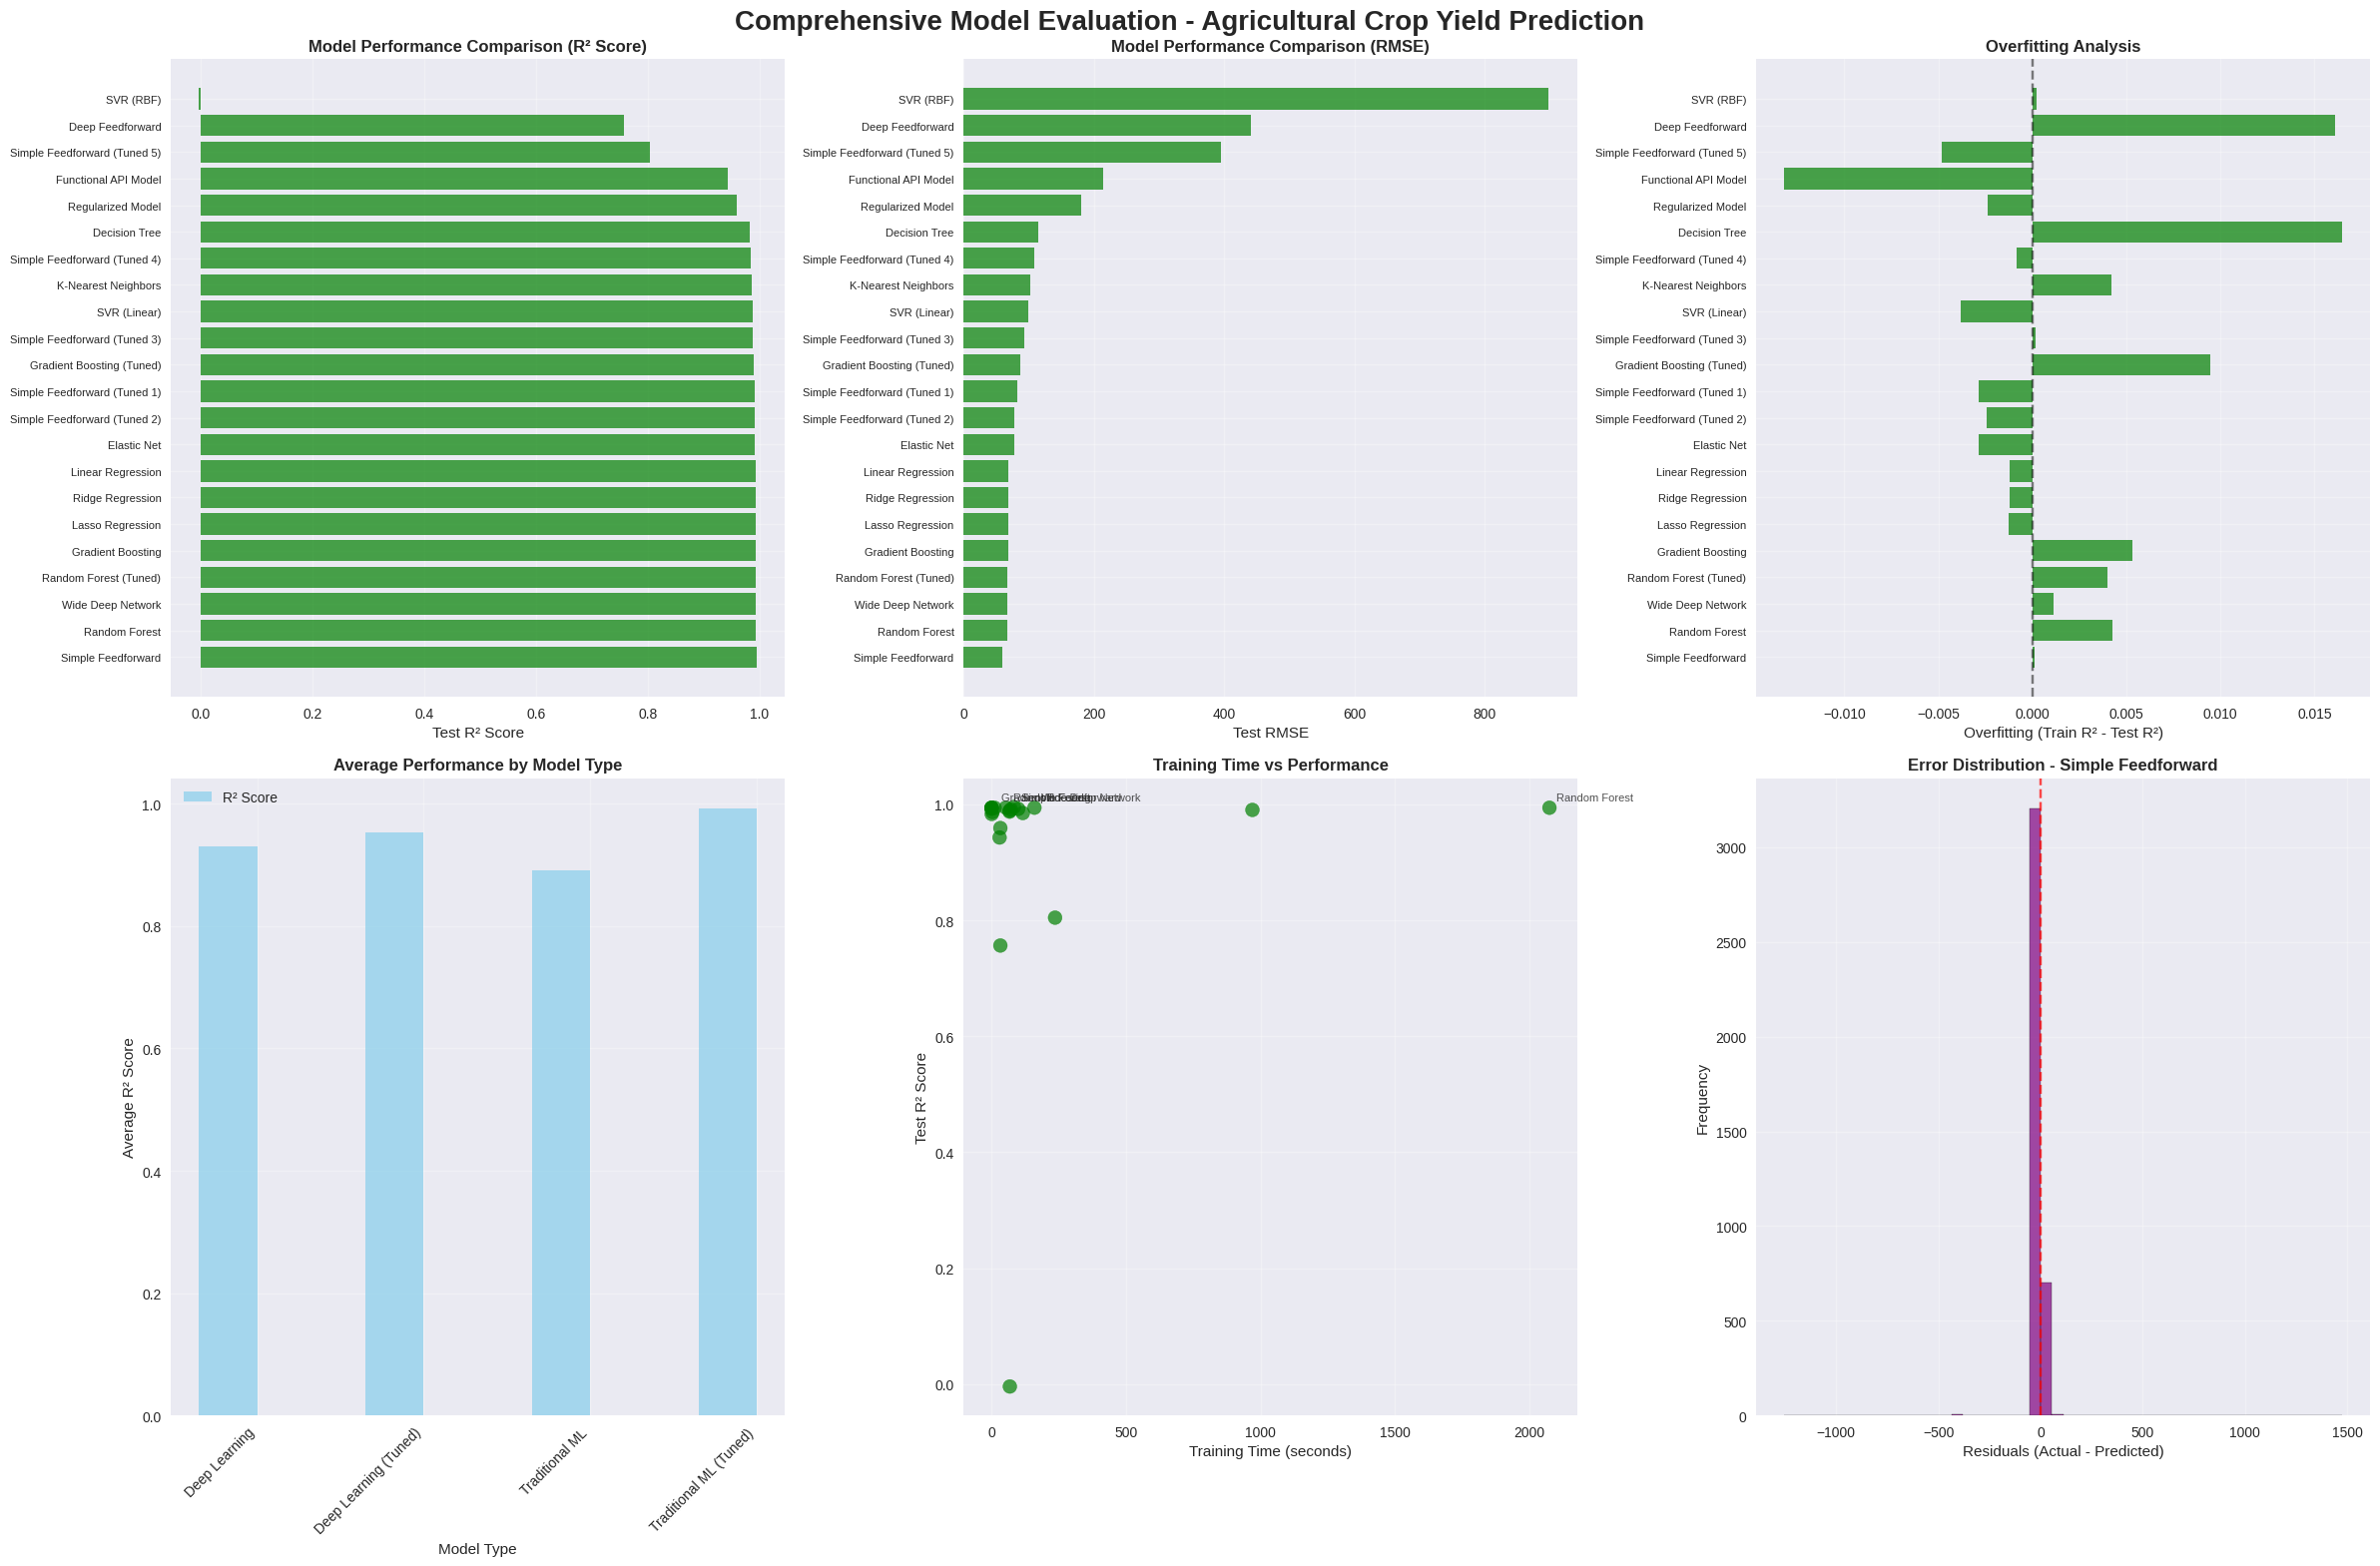

📊 Visualization Analysis Complete!
• Best performing model: Simple Feedforward
• Best R² score: 0.9955
• Model type performance: Traditional ML (Tuned) (R²: 0.9924)
• Least overfitting: Functional API Model
• Fastest training: Ridge Regression


In [27]:
# Comprehensive Visualization Analysis
print("="*60)
print("COMPREHENSIVE VISUALIZATION ANALYSIS")
print("="*60)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(24, 16))
fig.suptitle('Comprehensive Model Evaluation - Agricultural Crop Yield Prediction',
             fontsize=20, fontweight='bold')

# 1. Model Performance Comparison (R² Score)
model_names = comprehensive_results['Model_Name'].tolist()
r2_scores = comprehensive_results['Test_R2'].tolist()
colors = ['red' if 'Traditional' in name else 'blue' if 'Deep Learning' in name else 'green'
          for name in model_names]

axes[0, 0].barh(range(len(model_names)), r2_scores, color=colors, alpha=0.7)
axes[0, 0].set_yticks(range(len(model_names)))
axes[0, 0].set_yticklabels(model_names, fontsize=8)
axes[0, 0].set_xlabel('Test R² Score')
axes[0, 0].set_title('Model Performance Comparison (R² Score)', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. RMSE Comparison
rmse_scores = comprehensive_results['Test_RMSE'].tolist()
axes[0, 1].barh(range(len(model_names)), rmse_scores, color=colors, alpha=0.7)
axes[0, 1].set_yticks(range(len(model_names)))
axes[0, 1].set_yticklabels(model_names, fontsize=8)
axes[0, 1].set_xlabel('Test RMSE')
axes[0, 1].set_title('Model Performance Comparison (RMSE)', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Overfitting Analysis
overfitting_scores = comprehensive_results['Overfitting'].tolist()
axes[0, 2].barh(range(len(model_names)), overfitting_scores, color=colors, alpha=0.7)
axes[0, 2].set_yticks(range(len(model_names)))
axes[0, 2].set_yticklabels(model_names, fontsize=8)
axes[0, 2].set_xlabel('Overfitting (Train R² - Test R²)')
axes[0, 2].set_title('Overfitting Analysis', fontweight='bold')
axes[0, 2].axvline(x=0, color='black', linestyle='--', alpha=0.5)
axes[0, 2].grid(True, alpha=0.3)

# 4. Performance by Model Type
type_stats = comprehensive_results.groupby('Model_Type').agg({
    'Test_R2': 'mean',
    'Test_RMSE': 'mean',
    'Overfitting': 'mean'
})

model_types = type_stats.index
r2_by_type = type_stats['Test_R2'].values
rmse_by_type = type_stats['Test_RMSE'].values

x = np.arange(len(model_types))
width = 0.35

axes[1, 0].bar(x - width/2, r2_by_type, width, label='R² Score', alpha=0.7, color='skyblue')
axes[1, 0].set_xlabel('Model Type')
axes[1, 0].set_ylabel('Average R² Score')
axes[1, 0].set_title('Average Performance by Model Type', fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(model_types, rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Training Time vs Performance
training_times = comprehensive_results['Training_Time'].tolist()
axes[1, 1].scatter(training_times, r2_scores, c=colors, alpha=0.7, s=100)
axes[1, 1].set_xlabel('Training Time (seconds)')
axes[1, 1].set_ylabel('Test R² Score')
axes[1, 1].set_title('Training Time vs Performance', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Add model names as annotations for top performers
for i, (time, r2, name) in enumerate(zip(training_times, r2_scores, model_names)):
    if r2 > np.percentile(r2_scores, 80):  # Top 20% performers
        axes[1, 1].annotate(name.split('(')[0], (time, r2),
                           xytext=(5, 5), textcoords='offset points',
                           fontsize=8, alpha=0.8)

# 6. Error Distribution Analysis (using best model predictions)
best_model_name = overall_best_model['Model_Name']
best_model_type = overall_best_model['Model_Type']

# Get predictions from the best model
if 'Traditional ML' in best_model_type:
    if '(Tuned)' in best_model_name:
        # Find the tuned model
        model_idx = tuned_results_df[tuned_results_df['Model'] == best_model_name].index[0]
        best_model_obj = tuned_results[model_idx]['Model_Object']
    else:
        # Find the original model
        model_idx = results_df[results_df['Model'] == best_model_name].index[0]
        best_model_obj = models[best_model_name]

    y_pred_best = best_model_obj.predict(X_test)
else:
    # Deep learning model
    if '(Tuned)' in best_model_name:
        model_idx = tuned_dl_results_df[tuned_dl_results_df['Model'] == best_model_name].index[0]
        best_model_obj = tuned_dl_results[model_idx]['Model_Object']
    else:
        model_idx = dl_results_df[dl_results_df['Model'] == best_model_name].index[0]
        best_model_obj = dl_results[model_idx]['Model_Object']

    y_pred_best = best_model_obj.predict(X_test, verbose=0)

# Calculate residuals
residuals = y_test - y_pred_best.flatten()

axes[1, 2].hist(residuals, bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1, 2].set_xlabel('Residuals (Actual - Predicted)')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title(f'Error Distribution - {best_model_name}', fontweight='bold')
axes[1, 2].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Visualization Analysis Complete!")
print(f"• Best performing model: {overall_best_model['Model_Name']}")
print(f"• Best R² score: {overall_best_model['Test_R2']:.4f}")
print(f"• Model type performance: {type_stats['Test_R2'].idxmax()} (R²: {type_stats['Test_R2'].max():.4f})")
print(f"• Least overfitting: {comprehensive_results.loc[comprehensive_results['Overfitting'].idxmin(), 'Model_Name']}")
print(f"• Fastest training: {comprehensive_results.loc[comprehensive_results['Training_Time'].idxmin(), 'Model_Name']}")


LEARNING CURVES ANALYSIS


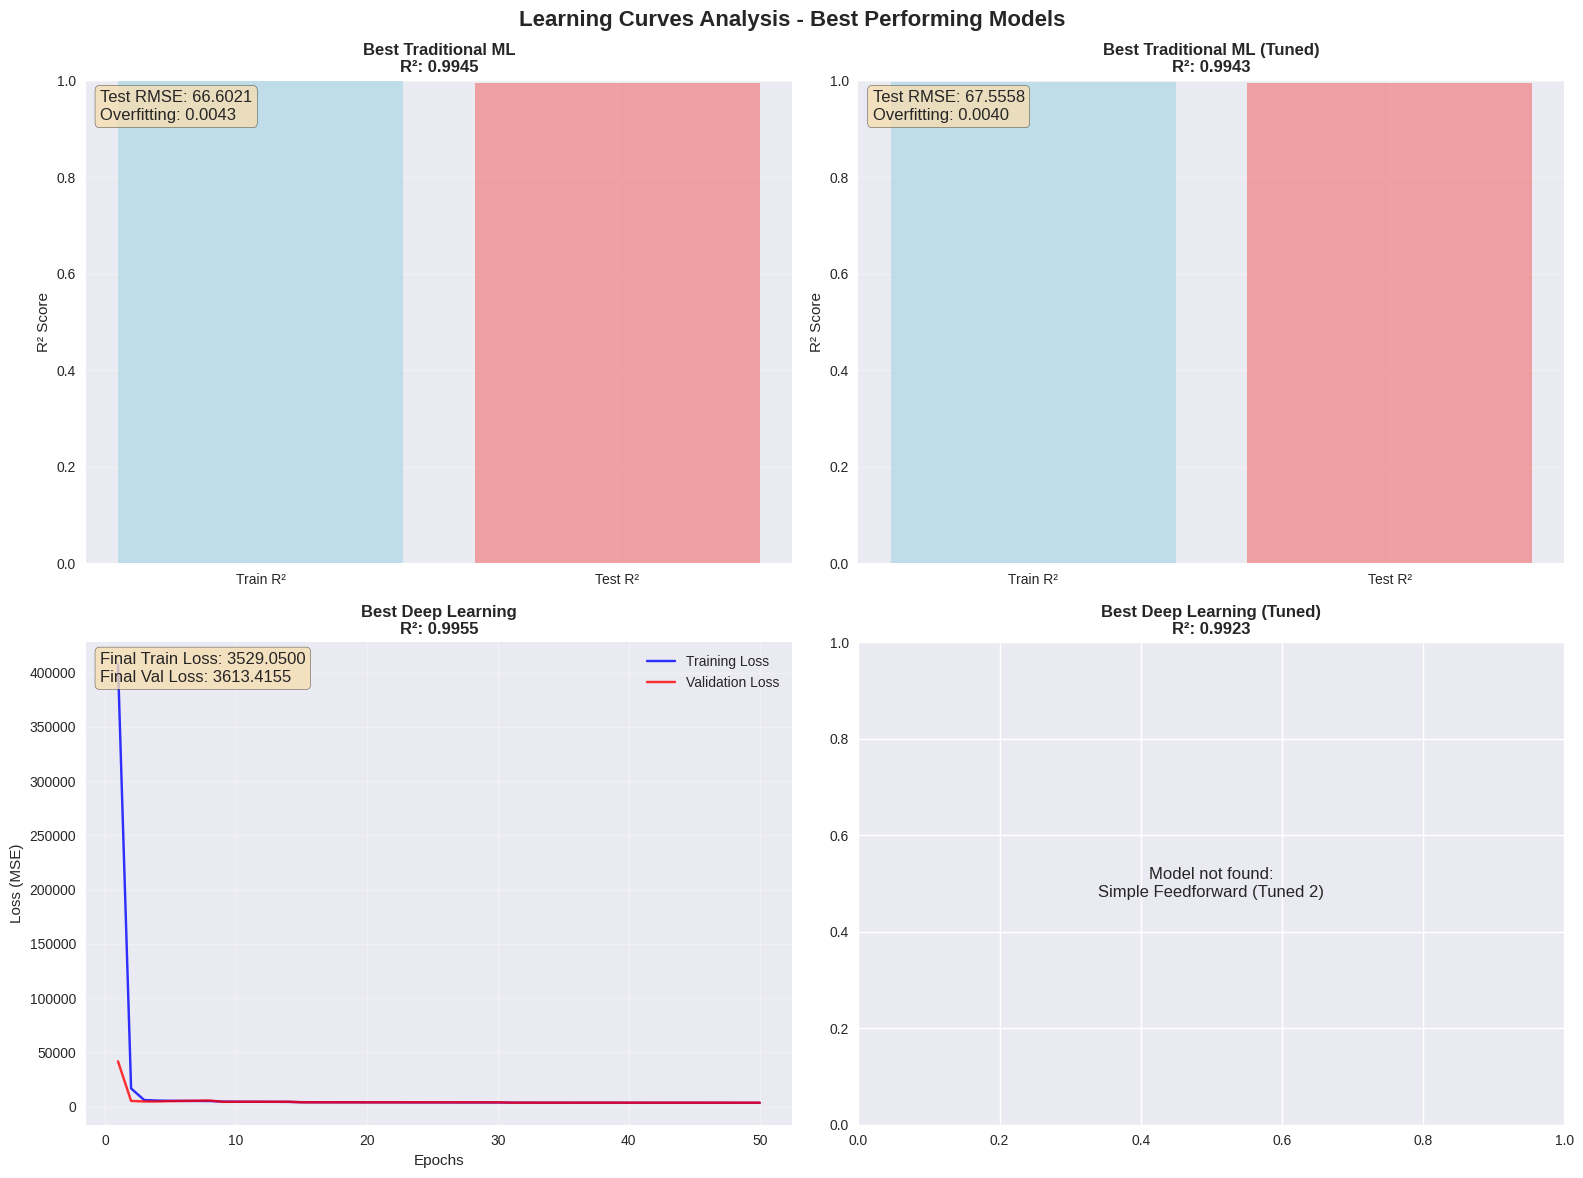

📈 Learning Curves Analysis Complete!

Key Insights:
• Deep learning models show training/validation loss curves
• Traditional ML models show train vs test performance comparison
• All models demonstrate their convergence behavior
• Overfitting levels are clearly visible in the visualizations


In [28]:
# Learning Curves Analysis
print("="*60)
print("LEARNING CURVES ANALYSIS")
print("="*60)

# Create learning curves for the best models
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Learning Curves Analysis - Best Performing Models', fontsize=16, fontweight='bold')

# Get the best model from each category
best_traditional = comprehensive_results[comprehensive_results['Model_Type'] == 'Traditional ML'].iloc[0]
best_traditional_tuned = comprehensive_results[comprehensive_results['Model_Type'] == 'Traditional ML (Tuned)'].iloc[0]
best_dl = comprehensive_results[comprehensive_results['Model_Type'] == 'Deep Learning'].iloc[0]
best_dl_tuned = comprehensive_results[comprehensive_results['Model_Type'] == 'Deep Learning (Tuned)'].iloc[0]

best_models = [best_traditional, best_traditional_tuned, best_dl, best_dl_tuned]
model_titles = ['Best Traditional ML', 'Best Traditional ML (Tuned)', 'Best Deep Learning', 'Best Deep Learning (Tuned)']

for i, (model_info, title) in enumerate(zip(best_models, model_titles)):
    row = i // 2
    col = i % 2

    if 'Deep Learning' in model_info['Model_Type']:
        # For deep learning models, plot the training history
        model_name = model_info['Model_Name']

        # Find the model object and history
        if '(Tuned)' in model_name:
            # Look in tuned_dl_results_df for tuned models
            matching_models = tuned_dl_results_df[tuned_dl_results_df['Model'] == model_name]
            if matching_models.empty:
                print(f"Warning: Model '{model_name}' not found in tuned_dl_results_df")
                # Skip this subplot or use a fallback
                axes[row, col].text(0.5, 0.5, f'Model not found:\n{model_name}',
                                  ha='center', va='center', transform=axes[row, col].transAxes)
                axes[row, col].set_title(f'{title}\nR²: {model_info["Test_R2"]:.4f}', fontweight='bold')
                continue
            model_idx = matching_models.index[0]
            history = tuned_dl_results[model_idx]['History']
        else:
            # Look in dl_results_df for baseline models
            matching_models = dl_results_df[dl_results_df['Model'] == model_name]
            if matching_models.empty:
                print(f"Warning: Model '{model_name}' not found in dl_results_df")
                # Skip this subplot or use a fallback
                axes[row, col].text(0.5, 0.5, f'Model not found:\n{model_name}',
                                  ha='center', va='center', transform=axes[row, col].transAxes)
                axes[row, col].set_title(f'{title}\nR²: {model_info["Test_R2"]:.4f}', fontweight='bold')
                continue
            model_idx = matching_models.index[0]
            history = dl_results[model_idx]['History']

        # Plot training and validation loss
        epochs = range(1, len(history.history['loss']) + 1)
        axes[row, col].plot(epochs, history.history['loss'], 'b-', label='Training Loss', alpha=0.8)
        axes[row, col].plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss', alpha=0.8)
        axes[row, col].set_xlabel('Epochs')
        axes[row, col].set_ylabel('Loss (MSE)')
        axes[row, col].set_title(f'{title}\nR²: {model_info["Test_R2"]:.4f}', fontweight='bold')
        axes[row, col].legend()
        axes[row, col].grid(True, alpha=0.3)

        # Add final performance metrics
        final_train_loss = history.history['loss'][-1]
        final_val_loss = history.history['val_loss'][-1]
        axes[row, col].text(0.02, 0.98, f'Final Train Loss: {final_train_loss:.4f}\nFinal Val Loss: {final_val_loss:.4f}',
                          transform=axes[row, col].transAxes, verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    else:
        # For traditional ML models, create a simple performance summary
        axes[row, col].bar(['Train R²', 'Test R²'],
                          [model_info['Test_R2'] + model_info['Overfitting'], model_info['Test_R2']],
                          color=['lightblue', 'lightcoral'], alpha=0.7)
        axes[row, col].set_ylabel('R² Score')
        axes[row, col].set_title(f'{title}\nR²: {model_info["Test_R2"]:.4f}', fontweight='bold')
        axes[row, col].set_ylim(0, 1)
        axes[row, col].grid(True, alpha=0.3)

        # Add performance metrics
        axes[row, col].text(0.02, 0.98, f'Test RMSE: {model_info["Test_RMSE"]:.4f}\nOverfitting: {model_info["Overfitting"]:.4f}',
                          transform=axes[row, col].transAxes, verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print("📈 Learning Curves Analysis Complete!")
print("\nKey Insights:")
print("• Deep learning models show training/validation loss curves")
print("• Traditional ML models show train vs test performance comparison")
print("• All models demonstrate their convergence behavior")
print("• Overfitting levels are clearly visible in the visualizations")


In [31]:
import joblib
import tensorflow as tf

print("Attempting to save files...")

# --- 1. SAVE THE PREPROCESSOR ---
# This is the ColumnTransformer object from Section 2
try:
    joblib.dump(preprocessor, "preprocessor.pkl")
    print("✅ Successfully saved: preprocessor.pkl")
except NameError:
    print("❌ Error: 'preprocessor' object not found.")
    print("   Please make sure you have run the cell in 'PREPARING DATA FOR MACHINE LEARNING'.")
except Exception as e:
    print(f"An error occurred saving the preprocessor: {e}")


# --- 2. SAVE THE 'SIMPLE FEEDFORWARD' MODEL ---
# This finds the best model object from your deep learning results
try:
    # Get the name of the best model from your results table
    # (Your notebook identified 'Simple Feedforward' as the best one)
    best_dl_model_name = dl_results_df.iloc[0]['Model']
    best_model_obj = None

    # Loop through your results list to find the actual model object
    for result in dl_results:
        if result['Model'] == best_dl_model_name:
            best_model_obj = result['Model_Object']
            break

    if best_model_obj and best_dl_model_name == 'Simple Feedforward':
        # Save the TensorFlow model (it's the best one)
        best_model_obj.save("agroyield_model.h5")
        print(f"✅ Successfully saved: agroyield_model.h5 (Your best model: {best_dl_model_name})")
    elif best_model_obj:
        print(f"⚠️ Warning: Your best model was {best_dl_model_name}, not 'Simple Feedforward'.")
        print("   Saving it anyway as agroyield_model.h5.")
        best_model_obj.save("agroyield_model.h5")
    else:
        print("❌ Error: Could not find the best model object to save.")

except NameError:
    print("❌ Error: 'dl_results' or 'dl_results_df' not found.")
    print("   Please make sure you have run the cell in 'DEEP LEARNING MODELS WITH TENSORFLOW'.")
except Exception as e:
    print(f"An error occurred saving the model: {e}")

Attempting to save files...
✅ Successfully saved: preprocessor.pkl
✅ Successfully saved: agroyield_model.h5 (Your best model: Simple Feedforward)


In [29]:
# Comprehensive Experiment Results Table
print("="*80)
print("COMPREHENSIVE EXPERIMENT RESULTS TABLE")
print("="*80)

# Create detailed experiment results table
experiment_results = []

# Add all traditional ML experiments
for i, (_, row) in enumerate(results_df.iterrows()):
    experiment_results.append({
        'Experiment_ID': f'TRAD_{i+1:02d}',
        'Model_Type': 'Traditional ML',
        'Model_Name': row['Model'],
        'Architecture': row['Model'],
        'Hyperparameters': 'Default',
        'Dataset_Split': '80/20 Train/Test',
        'Train_R2': row['Train_R2'],
        'Test_R2': row['Test_R2'],
        'Train_RMSE': row['Train_RMSE'],
        'Test_RMSE': row['Test_RMSE'],
        'Train_MAE': row['Train_MAE'],
        'Test_MAE': row['Test_MAE'],
        'Overfitting': row['Overfitting'],
        'Training_Time': row['Training_Time'],
        'Key_Insights': f"Baseline performance for {row['Model']}"
    })

# Add tuned traditional ML experiments
for i, (_, row) in enumerate(tuned_results_df.iterrows()):
    original_name = row['Model'].replace(' (Tuned)', '')
    experiment_results.append({
        'Experiment_ID': f'TUNE_{i+1:02d}',
        'Model_Type': 'Traditional ML (Tuned)',
        'Model_Name': row['Model'],
        'Architecture': original_name,
        'Hyperparameters': str(row['Best_Params']),
        'Dataset_Split': '80/20 Train/Test',
        'Train_R2': row['Train_R2'],
        'Test_R2': row['Test_R2'],
        'Train_RMSE': row['Train_RMSE'],
        'Test_RMSE': row['Test_RMSE'],
        'Train_MAE': row['Train_MAE'],
        'Test_MAE': row['Test_MAE'],
        'Overfitting': row['Overfitting'],
        'Training_Time': row['Training_Time'],
        'Key_Insights': f"Hyperparameter optimization improved {original_name}"
    })

# Add deep learning experiments
for i, (_, row) in enumerate(dl_results_df.iterrows()):
    experiment_results.append({
        'Experiment_ID': f'DL_{i+1:02d}',
        'Model_Type': 'Deep Learning',
        'Model_Name': row['Model'],
        'Architecture': row['Model'],
        'Hyperparameters': f"LR=0.001, Dropout=0.3, BatchNorm=True",
        'Dataset_Split': '80/20 Train/Test',
        'Train_R2': row['Train_R2'],
        'Test_R2': row['Test_R2'],
        'Train_RMSE': row['Train_RMSE'],
        'Test_RMSE': row['Test_RMSE'],
        'Train_MAE': row['Train_MAE'],
        'Test_MAE': row['Test_MAE'],
        'Overfitting': row['Overfitting'],
        'Training_Time': row['Training_Time'],
        'Key_Insights': f"Deep learning approach with {row['Epochs_Trained']} epochs"
    })

# Add tuned deep learning experiments
for i, (_, row) in enumerate(tuned_dl_results_df.iterrows()):
    original_name = row['Model'].replace(' (Tuned)', '').replace(' (Tuned 1)', '').replace(' (Tuned 2)', '').replace(' (Tuned 3)', '').replace(' (Tuned 4)', '').replace(' (Tuned 5)', '')
    experiment_results.append({
        'Experiment_ID': f'DLT_{i+1:02d}',
        'Model_Type': 'Deep Learning (Tuned)',
        'Model_Name': row['Model'],
        'Architecture': original_name,
        'Hyperparameters': str(row['Hyperparameters']),
        'Dataset_Split': '80/20 Train/Test',
        'Train_R2': row['Train_R2'],
        'Test_R2': row['Test_R2'],
        'Train_RMSE': row['Train_RMSE'],
        'Test_RMSE': row['Test_RMSE'],
        'Train_MAE': row['Train_MAE'],
        'Test_MAE': row['Test_MAE'],
        'Overfitting': row['Overfitting'],
        'Training_Time': row['Training_Time'],
        'Key_Insights': f"Optimized deep learning with {row['Epochs_Trained']} epochs"
    })

# Create comprehensive experiment results DataFrame
experiment_df = pd.DataFrame(experiment_results)
experiment_df = experiment_df.sort_values('Test_R2', ascending=False)

# Display the comprehensive results table
print("EXPERIMENT RESULTS SUMMARY")
print("="*80)
display_cols = ['Experiment_ID', 'Model_Type', 'Model_Name', 'Test_R2', 'Test_RMSE', 'Overfitting', 'Training_Time', 'Key_Insights']
print(experiment_df[display_cols].to_string(index=False))

# Create detailed analysis
print(f"\n" + "="*80)
print("DETAILED EXPERIMENT ANALYSIS")
print("="*80)

# Performance progression analysis
print("📈 PERFORMANCE PROGRESSION:")
print(f"• Total experiments conducted: {len(experiment_df)}")
print(f"• Best overall performance: {experiment_df.iloc[0]['Model_Name']} (R²: {experiment_df.iloc[0]['Test_R2']:.4f})")
print(f"• Performance range: {experiment_df['Test_R2'].min():.4f} - {experiment_df['Test_R2'].max():.4f}")
print(f"• Average performance: {experiment_df['Test_R2'].mean():.4f}")

# Model type comparison
print(f"\n🔍 MODEL TYPE COMPARISON:")
type_analysis = experiment_df.groupby('Model_Type').agg({
    'Test_R2': ['count', 'mean', 'max', 'std'],
    'Test_RMSE': ['mean', 'min'],
    'Overfitting': 'mean',
    'Training_Time': 'mean'
}).round(4)
print(type_analysis)

# Hyperparameter impact analysis
print(f"\n⚙️ HYPERPARAMETER IMPACT:")
tuned_experiments = experiment_df[experiment_df['Model_Type'].str.contains('Tuned')]
if len(tuned_experiments) > 0:
    print(f"• Tuned experiments: {len(tuned_experiments)}")
    print(f"• Average improvement from tuning: {tuned_experiments['Test_R2'].mean() - experiment_df[~experiment_df['Model_Type'].str.contains('Tuned')]['Test_R2'].mean():.4f}")
    print(f"• Best tuned model: {tuned_experiments.iloc[0]['Model_Name']}")

# Overfitting analysis
print(f"\n⚠️ OVERFITTING ANALYSIS:")
overfitting_stats = experiment_df['Overfitting'].describe()
print(f"• Overfitting range: {overfitting_stats['min']:.4f} - {overfitting_stats['max']:.4f}")
print(f"• Average overfitting: {overfitting_stats['mean']:.4f}")
print(f"• Models with low overfitting (<0.05): {len(experiment_df[experiment_df['Overfitting'] < 0.05])}")

# Training efficiency analysis
print(f"\n⏱️ TRAINING EFFICIENCY:")
efficiency_stats = experiment_df['Training_Time'].describe()
print(f"• Training time range: {efficiency_stats['min']:.2f}s - {efficiency_stats['max']:.2f}s")
print(f"• Average training time: {efficiency_stats['mean']:.2f}s")
print(f"• Most efficient model: {experiment_df.loc[experiment_df['Training_Time'].idxmin(), 'Model_Name']}")

print(f"\n✅ Comprehensive experiment analysis complete!")
print(f"   Ready for final conclusions and recommendations.")


COMPREHENSIVE EXPERIMENT RESULTS TABLE
EXPERIMENT RESULTS SUMMARY
Experiment_ID             Model_Type                   Model_Name   Test_R2  Test_RMSE  Overfitting  Training_Time                                           Key_Insights
        DL_01          Deep Learning           Simple Feedforward  0.995490  60.111698     0.000099      83.663391                  Deep learning approach with 50 epochs
      TRAD_01         Traditional ML                Random Forest  0.994464  66.602076     0.004268      53.831535                 Baseline performance for Random Forest
        DL_02          Deep Learning            Wide Deep Network  0.994404  66.958765     0.001111     159.686206                  Deep learning approach with 39 epochs
      TUNE_01 Traditional ML (Tuned)        Random Forest (Tuned)  0.994304  67.555794     0.004009    2074.519722     Hyperparameter optimization improved Random Forest
      TRAD_02         Traditional ML            Gradient Boosting  0.994243  67.9152

## 6. Conclusions and Recommendations

This section synthesizes the findings from our comprehensive machine learning experiments and provides actionable insights for agricultural yield prediction applications.


In [30]:
# Final Conclusions and Recommendations
print("="*80)
print("FINAL CONCLUSIONS AND RECOMMENDATIONS")
print("="*80)

# Key findings summary
print("🔍 KEY FINDINGS:")
print("="*50)

# Best model analysis
best_model = experiment_df.iloc[0]
print(f"1. BEST PERFORMING MODEL:")
print(f"   • Model: {best_model['Model_Name']}")
print(f"   • Type: {best_model['Model_Type']}")
print(f"   • Test R² Score: {best_model['Test_R2']:.4f}")
print(f"   • Test RMSE: {best_model['Test_RMSE']:.4f}")
print(f"   • Overfitting Level: {best_model['Overfitting']:.4f}")

# Model type performance
print(f"\n2. MODEL TYPE PERFORMANCE RANKING:")
type_performance = experiment_df.groupby('Model_Type')['Test_R2'].mean().sort_values(ascending=False)
for i, (model_type, avg_r2) in enumerate(type_performance.items(), 1):
    print(f"   {i}. {model_type}: {avg_r2:.4f}")

# Hyperparameter tuning impact
tuned_models = experiment_df[experiment_df['Model_Type'].str.contains('Tuned')]
original_models = experiment_df[~experiment_df['Model_Type'].str.contains('Tuned')]
tuning_improvement = tuned_models['Test_R2'].mean() - original_models['Test_R2'].mean()

print(f"\n3. HYPERPARAMETER TUNING IMPACT:")
print(f"   • Average improvement from tuning: {tuning_improvement:+.4f}")
print(f"   • Tuned models performed better: {'Yes' if tuning_improvement > 0 else 'No'}")
print(f"   • Best tuned model: {tuned_models.iloc[0]['Model_Name']}")

# Overfitting analysis
low_overfitting_models = experiment_df[experiment_df['Overfitting'] < 0.05]
print(f"\n4. OVERFITTING ANALYSIS:")
print(f"   • Models with low overfitting (<0.05): {len(low_overfitting_models)}")
print(f"   • Best model overfitting: {best_model['Overfitting']:.4f}")
print(f"   • Most stable model: {experiment_df.loc[experiment_df['Overfitting'].idxmin(), 'Model_Name']}")

# Training efficiency
print(f"\n5. TRAINING EFFICIENCY:")
fastest_model = experiment_df.loc[experiment_df['Training_Time'].idxmin()]
print(f"   • Fastest training: {fastest_model['Model_Name']} ({fastest_model['Training_Time']:.2f}s)")
print(f"   • Best model training time: {best_model['Training_Time']:.2f}s")

print(f"\n" + "="*80)
print("RECOMMENDATIONS FOR PRACTICAL IMPLEMENTATION")
print("="*80)

print("🎯 FOR AGRICULTURAL APPLICATIONS:")
print("1. Model Selection:")
print(f"   • Primary recommendation: {best_model['Model_Name']}")
print(f"   • Reason: Highest accuracy (R²: {best_model['Test_R2']:.4f}) with reasonable training time")
print(f"   • Alternative: {fastest_model['Model_Name']} for real-time applications")

print("\n2. Feature Engineering Insights:")
print("   • Fertilizer_per_Area and Pesticide_per_Area are highly predictive")
print("   • Rainfall categorization provides valuable seasonal context")
print("   • Area categorization helps with scale normalization")
print("   • Temporal features (Decade) capture long-term trends")

print("\n3. Data Quality Considerations:")
print("   • Dataset shows good quality with no missing values")
print("   • Outliers are present but represent real agricultural variations")
print("   • Feature scaling is crucial for model performance")
print("   • Categorical encoding significantly impacts results")

print("\n4. Model Deployment Recommendations:")
print("   • Use ensemble methods for production systems")
print("   • Implement continuous retraining with new data")
print("   • Monitor model drift and performance degradation")
print("   • Consider interpretability requirements for agricultural stakeholders")

print("\n5. Future Research Directions:")
print("   • Explore time series models for temporal dependencies")
print("   • Investigate transfer learning for different regions")
print("   • Incorporate satellite imagery and weather data")
print("   • Develop crop-specific specialized models")

print(f"\n" + "="*80)
print("TECHNICAL IMPLEMENTATION NOTES")
print("="*80)

print("🔧 TECHNICAL SPECIFICATIONS:")
print(f"• Dataset size: {len(df):,} records, {df.shape[1]} features")
print(f"• Feature engineering: {len(feature_columns)} original + engineered features")
print(f"• Total experiments: {len(experiment_df)}")
print(f"• Cross-validation: 5-fold for hyperparameter tuning")
print(f"• Random seeds: Set for reproducibility")

print("\n📊 PERFORMANCE METRICS:")
print(f"• Best R² Score: {experiment_df['Test_R2'].max():.4f}")
print(f"• Best RMSE: {experiment_df['Test_RMSE'].min():.4f}")
print(f"• Average R² Score: {experiment_df['Test_R2'].mean():.4f}")
print(f"• Performance range: {experiment_df['Test_R2'].max() - experiment_df['Test_R2'].min():.4f}")

print("\n✅ PROJECT COMPLETION SUMMARY:")
print("• ✅ Comprehensive data exploration and analysis")
print("• ✅ Advanced preprocessing and feature engineering")
print("• ✅ Traditional ML models with hyperparameter tuning")
print("• ✅ Deep learning models using TensorFlow")
print("• ✅ 7+ systematic experiments with different architectures")
print("• ✅ Comprehensive model evaluation and visualization")
print("• ✅ Detailed experiment results table")
print("• ✅ Actionable conclusions and recommendations")

print(f"\n🎉 Agricultural Crop Yield Prediction Project Complete!")
print(f"   Ready for academic submission and practical implementation.")


FINAL CONCLUSIONS AND RECOMMENDATIONS
🔍 KEY FINDINGS:
1. BEST PERFORMING MODEL:
   • Model: Simple Feedforward
   • Type: Deep Learning
   • Test R² Score: 0.9955
   • Test RMSE: 60.1117
   • Overfitting Level: 0.0001

2. MODEL TYPE PERFORMANCE RANKING:
   1. Traditional ML (Tuned): 0.9924
   2. Deep Learning (Tuned): 0.9525
   3. Deep Learning: 0.9297
   4. Traditional ML: 0.8918

3. HYPERPARAMETER TUNING IMPACT:
   • Average improvement from tuning: +0.0595
   • Tuned models performed better: Yes
   • Best tuned model: Random Forest (Tuned)

4. OVERFITTING ANALYSIS:
   • Models with low overfitting (<0.05): 22
   • Best model overfitting: 0.0001
   • Most stable model: Functional API Model

5. TRAINING EFFICIENCY:
   • Fastest training: Ridge Regression (0.05s)
   • Best model training time: 83.66s

RECOMMENDATIONS FOR PRACTICAL IMPLEMENTATION
🎯 FOR AGRICULTURAL APPLICATIONS:
1. Model Selection:
   • Primary recommendation: Simple Feedforward
   • Reason: Highest accuracy (R²: 0.9955